<a href="https://colab.research.google.com/github/deecodess/Pytorch/blob/main/Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING PYTORCH

In [ ]:
import torch
import math
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms


TENSOR BASICS

 A tensor is a container for numerical data. It is the way we store the information that we'll use within our system.
 A tensor of order zero (zeroth-order tensor) is a scalar



In [ ]:
if torch.cuda.is_available():
  device = torch.device("cuda")

Mathematical Operations

In [ ]:
p=torch.empty(2,2,3)
print(p)
x=torch.rand(2,2)
y=torch.rand(2,2)
print(x)
print(y)
z=x+y
z=torch.add(x,y)
print(z)
#y.add_(x)
#print(y)

q=torch.mul(x,y)
print(q)

tensor([[[5.6873e-38, 0.0000e+00, 2.5353e+30],
         [6.1797e-43, 0.0000e+00, 3.2551e-39]],

        [[3.7380e-35, 0.0000e+00, 3.7370e-35],
         [0.0000e+00, 3.7379e-35, 0.0000e+00]]])
tensor([[0.6075, 0.8266],
        [0.5598, 0.2117]])
tensor([[0.7100, 0.5913],
        [0.4627, 0.3293]])
tensor([[1.3175, 1.4178],
        [1.0224, 0.5410]])
tensor([[0.4313, 0.4887],
        [0.2590, 0.0697]])


Using Random

In [ ]:
x=torch.rand(4,4)
print(x)
y=x.view(-1,8)
print(y)

tensor([[0.5083, 0.5670, 0.6861, 0.1477],
        [0.4622, 0.5594, 0.6025, 0.7455],
        [0.9682, 0.9574, 0.3778, 0.3383],
        [0.1760, 0.3324, 0.3147, 0.4066]])
tensor([[0.5083, 0.5670, 0.6861, 0.1477, 0.4622, 0.5594, 0.6025, 0.7455],
        [0.9682, 0.9574, 0.3778, 0.3383, 0.1760, 0.3324, 0.3147, 0.4066]])


Tensor to Numpy Array

In [ ]:
a=torch.ones(5)
print(a)
b=a.numpy()
print(type(b)) #tensor to numpy array
a.add_(1)
print(a)
print(b)


tensor([1., 1., 1., 1., 1.])
<class 'numpy.ndarray'>
tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


Numpy array to Torch

In [ ]:
a=np.ones(5)
print(a)
b=torch.from_numpy(a)
print(b)

a==1
print(a)
print(b)

[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


AUTOGRAD

Autograd is reverse automatic differentiation system. Conceptually, autograd records a graph recording all of the operations that created the data as you execute operations, giving you a directed acyclic graph whose leaves are the input tensors and roots are the output tensors. By tracing this graph from roots to leaves, you can automatically compute the gradients using the chain rule.

In [ ]:
x=torch.randn(3, requires_grad=True)
print(x)

tensor([0.5624, 1.2580, 2.3879], requires_grad=True)


In [ ]:
#x.requires_grad_(False)
#x.detach()
#with torch.no_grad():
y=x+2
print(y)

tensor([2.5624, 3.2580, 4.3879], grad_fn=<AddBackward0>)


In [ ]:
weights = torch.ones(4,requires_grad=True)

for epoch in range(2):
  model_output=(weights*3).sum()

  model_output.backward()
  print(weights.grad)
  weights.grad.zero_()

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


BACK PROPAGATION

Given an artificial neural network and an error function, the method calculates the gradient of the error function with respect to the neural network's weights. This helps in reducing the error

In [ ]:
x=torch.tensor(1.0)
y=torch.tensor(2.0)

w=torch.tensor(1.0,requires_grad=True)

#forward pass and compute the loss
y_hat= w * x
loss = (y_hat - y)**2

print(loss)

#backward pass
loss.backward()
print(w.grad)

# update weights
#next forward and backward pass

tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


GRADIENT DESCENT

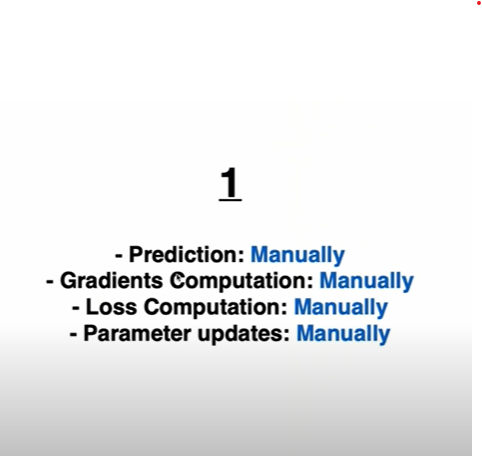

In [ ]:
#f = w*x
#f=2*x
X=np.array([1,2,3,4],dtype=np.float32)
Y=np.array([2,4,6,8],dtype=np.float32)

w=0.0

#model prediction
def forward(x):
  return w*x

#loss = Mean Square
def loss(y,y_predicted):
  return((y_predicted-y)**2).mean()

#gradient
#MSE = 1/N * (w*x-y)**2
#dJ/dw= 1/N 2x(w*x-y)
def gradient(x,y,y_predicted):
  return np.dot(2*x,y_predicted-y).mean()

print(f'Prediction before training: f(5)={forward(5):.3f}')

#Training
learning_rate = 0.01
n_iters = 10

for epoch in range(n_iters):
  #prediction= forward pass
  y_pred=forward(X)

  #loss
  l=loss(Y,y_pred)

  #gradients
  dw=gradient(X,Y,y_pred)

  #update weights
  w-=learning_rate * dw

  if epoch % 1==0:
    print(f'epoch{epoch+1}: w = {w:.3f},loss = {l:.8f}')
print(f'Prediction after training: f(5)={forward(5):.3f}')

Prediction before training: f(5)=0.000
epoch1: w = 1.200,loss = 30.00000000
epoch2: w = 1.680,loss = 4.79999924
epoch3: w = 1.872,loss = 0.76800019
epoch4: w = 1.949,loss = 0.12288000
epoch5: w = 1.980,loss = 0.01966083
epoch6: w = 1.992,loss = 0.00314574
epoch7: w = 1.997,loss = 0.00050331
epoch8: w = 1.999,loss = 0.00008053
epoch9: w = 1.999,loss = 0.00001288
epoch10: w = 2.000,loss = 0.00000206
Prediction after training: f(5)=9.999


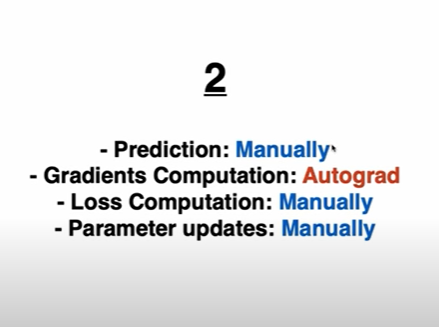

In [ ]:
X=torch.tensor([1,2,3,4],dtype=torch.float32)
Y=torch.tensor([2,4,6,8],dtype=torch.float32)

w=torch.tensor(0.0,dtype=torch.float32,requires_grad=True)

#model prediction
def forward(x):
  return w*x

#loss = Mean Square
def loss(y,y_predicted):
  return((y_predicted-y)**2).mean()

print(f'Prediction before training: f(5)={forward(5):.3f}')

#Training
learning_rate = 0.01
n_iters = 100

for epoch in range(n_iters):
  #prediction= forward pass
  y_pred=forward(X)

  #loss
  l=loss(Y,y_pred)

  #gradients=backward pass
  #dw=gradient(X,Y,y_pred)
  l.backward() #dl/dw

  #update weights
  with torch.no_grad():
    w-=learning_rate * w.grad
  #zero gradients
  w.grad.zero_()

  if epoch % 10==0:
    print(f'epoch{epoch+1}: w = {w:.3f},loss = {l:.8f}')
print(f'Prediction after training: f(5)={forward(5):.3f}')

Prediction before training: f(5)=0.000
epoch1: w = 0.300,loss = 30.00000000
epoch11: w = 1.665,loss = 1.16278565
epoch21: w = 1.934,loss = 0.04506890
epoch31: w = 1.987,loss = 0.00174685
epoch41: w = 1.997,loss = 0.00006770
epoch51: w = 1.999,loss = 0.00000262
epoch61: w = 2.000,loss = 0.00000010
epoch71: w = 2.000,loss = 0.00000000
epoch81: w = 2.000,loss = 0.00000000
epoch91: w = 2.000,loss = 0.00000000
Prediction after training: f(5)=10.000


TRAINING PIPELINE(Model/Loss/Optimizer)



1.   Design model( input,output size, forward pass)
2.   Construct loss and optmizer
3.   Training loop
     *   forward pass: compute prediction
     *   backward pass: gradients
     *   update weights

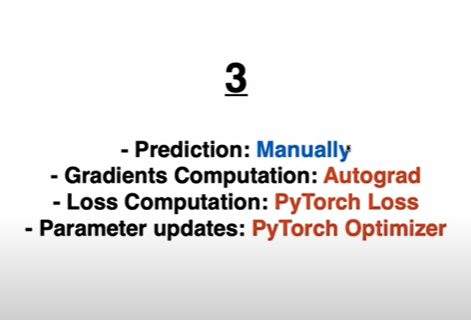

In [ ]:
X=torch.tensor([1,2,3,4],dtype=torch.float32)
Y=torch.tensor([2,4,6,8],dtype=torch.float32)

w=torch.tensor(0.0,dtype=torch.float32,requires_grad=True)

#model prediction
def forward(x):
  return w*x


print(f'Prediction before training: f(5)={forward(5):.3f}')

#Training
learning_rate = 0.01
n_iters = 100

loss = nn.MSELoss()
optimizer=torch.optim.SGD([w],lr=learning_rate)

for epoch in range(n_iters):
  #prediction= forward pass
  y_pred=forward(X)

  #loss
  l=loss(Y,y_pred)

  #gradients=backward pass
  #dw=gradient(X,Y,y_pred)
  l.backward() #dl/dw

  #update weights
  optimizer.step()
  #zero gradients
  optimizer.zero_grad()

  if epoch % 10==0:
    print(f'epoch{epoch+1}: w = {w:.3f},loss = {l:.8f}')
print(f'Prediction after training: f(5)={forward(5):.3f}')

Prediction before training: f(5)=0.000
epoch1: w = 0.300,loss = 30.00000000
epoch11: w = 1.665,loss = 1.16278565
epoch21: w = 1.934,loss = 0.04506890
epoch31: w = 1.987,loss = 0.00174685
epoch41: w = 1.997,loss = 0.00006770
epoch51: w = 1.999,loss = 0.00000262
epoch61: w = 2.000,loss = 0.00000010
epoch71: w = 2.000,loss = 0.00000000
epoch81: w = 2.000,loss = 0.00000000
epoch91: w = 2.000,loss = 0.00000000
Prediction after training: f(5)=10.000


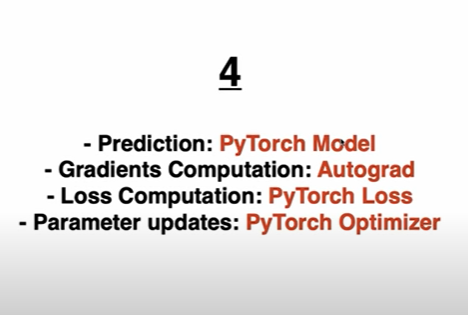

In [ ]:
X=torch.tensor([[1],[2],[3],[4]],dtype=torch.float32)
Y=torch.tensor([[2],[4],[6],[8]],dtype=torch.float32)

X_test = torch.tensor([5],dtype=torch.float32)
n_samples, n_features = X.shape
print(n_samples,n_features)

input_size = n_features
output_size = n_features
#model=nn.Linear(input_size,output_size)

class LinearRegression(nn.Module):
  def __init__(self,input_dim, output_dim):
    super(LinearRegression,self).__init__()
    #define layers
    self.lin= nn.Linear(input_dim,output_dim)

  def forward(self,x):
    return self.lin(x)

model = LinearRegression(input_size,output_size)
print(f'Prediction before training: f(5)={model(X_test).item():.3f}')

#Training
learning_rate = 0.01
n_iters = 100

loss = nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)

for epoch in range(n_iters):
  #prediction= forward pass
  y_pred=model(X)

  #loss
  l=loss(Y,y_pred)

  #gradients=backward pass
  #dw=gradient(X,Y,y_pred)
  l.backward() #dl/dw

  #update weights
  optimizer.step()
  #zero gradients
  optimizer.zero_grad()

  if epoch % 10==0:
    [w,b]=model.parameters()
    print(f'epoch{epoch+1}: w = {w[0][0].item():.3f},loss = {l:.8f}')
print(f'Prediction after training: f(5)={model(X_test).item():.3f}')

4 1
Prediction before training: f(5)=-4.644
epoch1: w = -0.275,loss = 70.31300354
epoch11: w = 1.645,loss = 1.81938970
epoch21: w = 1.953,loss = 0.04728311
epoch31: w = 2.002,loss = 0.00142213
epoch41: w = 2.010,loss = 0.00022400
epoch51: w = 2.011,loss = 0.00018211
epoch61: w = 2.011,loss = 0.00017077
epoch71: w = 2.011,loss = 0.00016081
epoch81: w = 2.010,loss = 0.00015145
epoch91: w = 2.010,loss = 0.00014264
Prediction after training: f(5)=10.020


LINEAR REGRESSION

Linear regression is a method for predicting y from x. In our case, y is the dependent variable, and x is the independent variable. We want to predict the value of y for a given value of x. Now, if the data were perfectly linear, we could simply calculate the slope intercept form of the line in terms y = mx+ b.

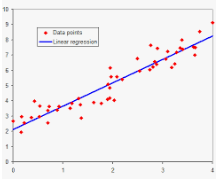



1.   Prepare Data
2.   Model
3.   Loss and Optimizer
4.   Training loop



epoch: 10, loss = 4430.2046
epoch: 20, loss = 3304.3718
epoch: 30, loss = 2489.7864
epoch: 40, loss = 1899.7719
epoch: 50, loss = 1471.9929
epoch: 60, loss = 1161.5568
epoch: 70, loss = 936.0845
epoch: 80, loss = 772.1955
epoch: 90, loss = 652.9838
epoch: 100, loss = 566.2128


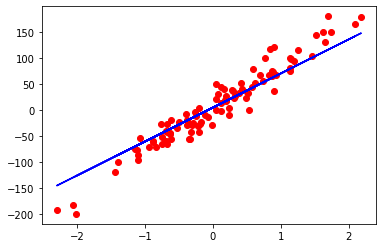

In [ ]:
# prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100,n_features=1,noise=20,random_state=1)
#cast to float tensor
X=torch.from_numpy(X_numpy.astype(np.float32))
y=torch.from_numpy(y_numpy.astype(np.float32))
y=y.view(y.shape[0],1)
# 1) Model
# Linear model f = wx + b
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

# 2) Loss and optimizer
learning_rate = 0.01

criterion = nn.MSELoss() # Mean Square Error
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  # SGD= Schostic Gradient Descent

# 3) Training loop
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)
    
    # Backward pass and update
    loss.backward()
    optimizer.step()

    # zero grad before new step
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

# Plot
predicted = model(X).detach().numpy() #detaching tensor and converting it to numpy

plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()



LOGISTIC REGRESSION

Logistic regression is a process of modeling the probability of a discrete outcome given an input variable. The most common logistic regression models a binary outcome; something that can take two values such as true/false, yes/no, and so on.

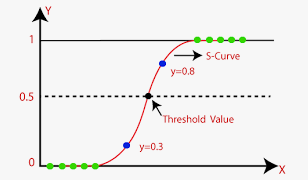

In [ ]:
# 0) Prepare data
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

n_samples, n_features = X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# scale
sc = StandardScaler() #this will make features have 0 mean and unit variance
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1) #reshapes the tensor
y_test = y_test.view(y_test.shape[0], 1)

# 1) Model
# Linear model f = wx + b , sigmoid at the end
class Model(nn.Module):
    def __init__(self, n_input_features):
        super(Model, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)

    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

model = Model(n_features)

# 2) Loss and optimizer
num_epochs = 100
learning_rate = 0.01
criterion = nn.BCELoss() #Binary Cross Entropy Loss
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) Training loop
for epoch in range(num_epochs):
    # Forward pass and loss
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    # Backward pass and update
    loss.backward()
    optimizer.step()

    # zero grad before new step
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')


with torch.no_grad():
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f'accuracy: {acc.item():.4f}')

epoch: 10, loss = 0.5626
epoch: 20, loss = 0.4766
epoch: 30, loss = 0.4196
epoch: 40, loss = 0.3787
epoch: 50, loss = 0.3475
epoch: 60, loss = 0.3228
epoch: 70, loss = 0.3025
epoch: 80, loss = 0.2855
epoch: 90, loss = 0.2710
epoch: 100, loss = 0.2585
accuracy: 0.9211


DATASET AND DATALOADERS

In [ ]:
# gradient computation etc. not efficient for whole data set
# -> divide dataset into small batches

'''
# training loop
for epoch in range(num_epochs):
    # loop over all batches
    for i in range(total_batches):
        batch_x, batch_y = ...
'''

# epoch = one forward and backward pass of ALL training samples
# batch_size = number of training samples used in one forward/backward pass
# number of iterations = number of passes, each pass (forward+backward) using [batch_size] number of sampes
# e.g : 100 samples, batch_size=20 -> 100/20=5 iterations for 1 epoch

# --> DataLoader can do the batch computation for us

# Implement a custom Dataset:
# inherit Dataset
# implement __init__ , __getitem__ , and __len__

class WineDataset(Dataset):

    def __init__(self):
        # Initialize data, download, etc.
        # read with numpy or pandas
        xy = np.loadtxt('./data/wine/wine.csv', delimiter=',', dtype=np.float32, skiprows=1)
        self.n_samples = xy.shape[0]

        # here the first column is the class label, the rest are the features
        self.x_data = torch.from_numpy(xy[:, 1:]) # size [n_samples, n_features]
        self.y_data = torch.from_numpy(xy[:, [0]]) # size [n_samples, 1]

    # support indexing such that dataset[i] can be used to get i-th sample
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    # we can call len(dataset) to return the size
    def __len__(self):
        return self.n_samples


# create dataset
dataset = WineDataset()

# get first sample and unpack
first_data = dataset[0]
features, labels = first_data
print(features, labels)

# Load whole dataset with DataLoader
# shuffle: shuffle data, good for training
# num_workers: faster loading with multiple subprocesses
# !!! IF YOU GET AN ERROR DURING LOADING, SET num_workers TO 0 !!!
train_loader = DataLoader(dataset=dataset,
                          batch_size=4,
                          shuffle=True,
                          num_workers=2)

# convert to an iterator and look at one random sample
dataiter = iter(train_loader)
data = dataiter.next()
features, labels = data
print(features, labels)

# Dummy Training loop
num_epochs = 2
total_samples = len(dataset)
n_iterations = math.ceil(total_samples/4)
print(total_samples, n_iterations)
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(train_loader):
        
        # here: 178 samples, batch_size = 4, n_iters=178/4=44.5 -> 45 iterations
        # Run your training process
        if (i+1) % 5 == 0:
            print(f'Epoch: {epoch+1}/{num_epochs}, Step {i+1}/{n_iterations}| Inputs {inputs.shape} | Labels {labels.shape}')

# some famous datasets are available in torchvision.datasets
# e.g. MNIST, Fashion-MNIST, CIFAR10, COCO

train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=torchvision.transforms.ToTensor(),  
                                           download=True)

train_loader = DataLoader(dataset=train_dataset, 
                                           batch_size=3, 
                                           shuffle=True)

# look at one random sample
dataiter = iter(train_loader)
data = dataiter.next()
inputs, targets = data
print(inputs.shape, targets.shape)

OSError: ignored

DATASET TRANSFORMS


Transforms can be applied to PIL images, tensors, ndarrays, or custom data during creation of the DataSet


On Images:

  CenterCrop, Grayscale, Pad, RandomAffine
  RandomCrop, RandomHorizontalFlip, RandomRotation
  Resize, Scale

On Tensors:

LinearTransformation, Normalize, RandomErasing

Conversion:

ToPILImage:

from tensor or ndrarray

ToTensor : 

from numpy.ndarray or PILImage

Generic:

Use Lambda :

Custom

Write own class

Compose multiple Transforms:

composed = transforms.Compose([Rescale


In [ ]:
class WineDataset(Dataset):

    def __init__(self, transform=None):
        xy = np.loadtxt('./data/wine/wine.csv', delimiter=',', dtype=np.float32, skiprows=1)
        self.n_samples = xy.shape[0]

        # note that we do not convert to tensor here
        self.x_data = xy[:, 1:]
        self.y_data = xy[:, [0]]

        self.transform = transform

    def __getitem__(self, index):
        sample = self.x_data[index], self.y_data[index]

        if self.transform:
            sample = self.transform(sample)

        return sample

    def __len__(self):
        return self.n_samples

# Custom Transforms
# implement __call__(self, sample)
class ToTensor:
    # Convert ndarrays to Tensors
    def __call__(self, sample):
        inputs, targets = sample
        return torch.from_numpy(inputs), torch.from_numpy(targets)

class MulTransform:
    # multiply inputs with a given factor
    def __init__(self, factor):
        self.factor = factor

    def __call__(self, sample):
        inputs, targets = sample
        inputs *= self.factor
        return inputs, targets

print('Without Transform')
dataset = WineDataset()
first_data = dataset[0]
features, labels = first_data
print(type(features), type(labels))
print(features, labels)

print('\nWith Tensor Transform')
dataset = WineDataset(transform=ToTensor())
first_data = dataset[0]
features, labels = first_data
print(type(features), type(labels))
print(features, labels)

print('\nWith Tensor and Multiplication Transform')
composed = torchvision.transforms.Compose([ToTensor(), MulTransform(4)])
dataset = WineDataset(transform=composed)
first_data = dataset[0]
features, labels = first_data
print(type(features), type(labels))
print(features, labels)

SOFTMAX AND CROSSENTROPY

The softmax function is a function that turns a vector of K real values into a vector of K real values that sum to 1. The input values can be positive, negative, zero, or greater than one, but the softmax transforms them into values between 0 and 1, so that they can be interpreted as probabilities.

Cross-entropy is a measure of the difference between two probability distributions for a given random variable or set of events.

In [ ]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

x = np.array([2.0, 1.0, 0.1])
outputs = softmax(x)
print('softmax numpy:', outputs)

x = torch.tensor([2.0, 1.0, 0.1])
outputs = torch.softmax(x, dim=0) # along values along first axis
print('softmax torch:', outputs)

# Cross entropy
# Cross-entropy loss, or log loss, measures the performance of a classification model 
# whose output is a probability value between 0 and 1. 
# -> loss increases as the predicted probability diverges from the actual label
def cross_entropy(actual, predicted):
    EPS = 1e-15
    predicted = np.clip(predicted, EPS, 1 - EPS)
    loss = -np.sum(actual * np.log(predicted))
    return loss # / float(predicted.shape[0])

# y must be one hot encoded
# if class 0: [1 0 0]
# if class 1: [0 1 0]
# if class 2: [0 0 1]
Y = np.array([1, 0, 0])
Y_pred_good = np.array([0.7, 0.2, 0.1])
Y_pred_bad = np.array([0.1, 0.3, 0.6])
l1 = cross_entropy(Y, Y_pred_good)
l2 = cross_entropy(Y, Y_pred_bad)
print(f'Loss1 numpy: {l1:.4f}')
print(f'Loss2 numpy: {l2:.4f}')

# CrossEntropyLoss in PyTorch (applies Softmax)
# nn.LogSoftmax + nn.NLLLoss
# NLLLoss = negative log likelihood loss
loss = nn.CrossEntropyLoss()
# loss(input, target)

# target is of size nSamples = 1
# each element has class label: 0, 1, or 2
# Y (=target) contains class labels, not one-hot
Y = torch.tensor([0])

# input is of size nSamples x nClasses = 1 x 3
# y_pred (=input) must be raw, unnormalizes scores (logits) for each class, not softmax
Y_pred_good = torch.tensor([[2.0, 1.0, 0.1]])
Y_pred_bad = torch.tensor([[0.5, 2.0, 0.3]])
l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)

print(f'PyTorch Loss1: {l1.item():.4f}')
print(f'PyTorch Loss2: {l2.item():.4f}')

# get predictions
_, predictions1 = torch.max(Y_pred_good, 1)
_, predictions2 = torch.max(Y_pred_bad, 1)
print(f'Actual class: {Y.item()}, Y_pred1: {predictions1.item()}, Y_pred2: {predictions2.item()}')

# allows batch loss for multiple samples

# target is of size nBatch = 3
# each element has class label: 0, 1, or 2
Y = torch.tensor([2, 0, 1])

# input is of size nBatch x nClasses = 3 x 3
# Y_pred are logits (not softmax)
Y_pred_good = torch.tensor(
    [[0.1, 0.2, 3.9], # predict class 2
    [1.2, 0.1, 0.3], # predict class 0
    [0.3, 2.2, 0.2]]) # predict class 1

Y_pred_bad = torch.tensor(
    [[0.9, 0.2, 0.1],
    [0.1, 0.3, 1.5],
    [1.2, 0.2, 0.5]])

l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)
print(f'Batch Loss1:  {l1.item():.4f}')
print(f'Batch Loss2: {l2.item():.4f}')

# get predictions
_, predictions1 = torch.max(Y_pred_good, 1)
_, predictions2 = torch.max(Y_pred_bad, 1)
print(f'Actual class: {Y}, Y_pred1: {predictions1}, Y_pred2: {predictions2}')

# Binary classification
class NeuralNet1(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet1, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, 1)  
    
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        # sigmoid at the end
        y_pred = torch.sigmoid(out)
        return y_pred

model = NeuralNet1(input_size=28*28, hidden_size=5)
criterion = nn.BCELoss()

# Multiclass problem
class NeuralNet2(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet2, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        # no softmax at the end
        return out

model = NeuralNet2(input_size=28*28, hidden_size=5, num_classes=3)
criterion = nn.CrossEntropyLoss()  # (applies Softmax)X

ACTIVATION FUNCTIONS

Activation function decides, whether a neuron should be activated or not by calculating weighted sum and further adding bias with it. The purpose of the activation function is to introduce non-linearity into the output of a neuron.

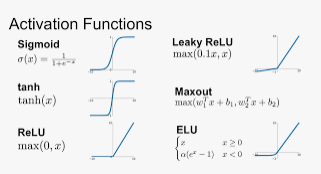

In [ ]:
x = torch.tensor([-1.0, 1.0, 2.0, 3.0])

# sofmax
output = torch.softmax(x, dim=0)
print(output)
sm = nn.Softmax(dim=0)
output = sm(x)
print(output)

# sigmoid 
output = torch.sigmoid(x)
print(output)
s = nn.Sigmoid()
output = s(x)
print(output)

#tanh
output = torch.tanh(x)
print(output)
t = nn.Tanh()
output = t(x)
print(output)

# relu
output = torch.relu(x)
print(output)
relu = nn.ReLU()
output = relu(x)
print(output)

# leaky relu
output = F.leaky_relu(x)
print(output)
lrelu = nn.LeakyReLU()
output = lrelu(x)
print(output)

#nn.ReLU() creates an nn.Module which you can add e.g. to an nn.Sequential model.
#torch.relu on the other side is just the functional API call to the relu function,
#so that you can add it e.g. in your forward method yourself.

# option 1 (create nn modules)
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        out = self.sigmoid(out)
        return out

# option 2 (use activation functions directly in forward pass)
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, 1)
    
    def forward(self, x):
        out = torch.relu(self.linear1(x))
        out = torch.sigmoid(self.linear2(out))
        return out

In [ ]:
##### Sigmoid
sigmoid = lambda x: 1 / (1 + np.exp(-x))

x=np.linspace(-10,10,10)

y=np.linspace(-10,10,100)

fig = plt.figure()
plt.plot(y,sigmoid(y),'b', label='linspace(-10,10,100)')

plt.grid(linestyle='--')

plt.xlabel('X Axis')

plt.ylabel('Y Axis')

plt.title('Sigmoid Function')

plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.yticks([-2, -1, 0, 1, 2])

plt.ylim(-2, 2)
plt.xlim(-4, 4)

plt.show()
#plt.savefig('sigmoid.png')

fig = plt.figure()

##### TanH
tanh = lambda x: 2*sigmoid(2*x)-1

x=np.linspace(-10,10,10)

y=np.linspace(-10,10,100)

plt.plot(y,tanh(y),'b', label='linspace(-10,10,100)')

plt.grid(linestyle='--')

plt.xlabel('X Axis')

plt.ylabel('Y Axis')

plt.title('TanH Function')

plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.yticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])

plt.ylim(-4, 4)
plt.xlim(-4, 4)

plt.show()
#plt.savefig('tanh.png')

fig = plt.figure()

##### ReLU
relu = lambda x: np.where(x>=0, x, 0)

x=np.linspace(-10,10,10)

y=np.linspace(-10,10,1000)

plt.plot(y,relu(y),'b', label='linspace(-10,10,100)')

plt.grid(linestyle='--')

plt.xlabel('X Axis')

plt.ylabel('Y Axis')

plt.title('ReLU')

plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.yticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])

plt.ylim(-4, 4)
plt.xlim(-4, 4)

plt.show()
#plt.savefig('relu.png')

fig = plt.figure()

##### Leaky ReLU
leakyrelu = lambda x: np.where(x>=0, x, 0.1*x)

x=np.linspace(-10,10,10)

y=np.linspace(-10,10,1000)

plt.plot(y,leakyrelu(y),'b', label='linspace(-10,10,100)')

plt.grid(linestyle='--')

plt.xlabel('X Axis')

plt.ylabel('Y Axis')

plt.title('Leaky ReLU')

plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.yticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])

plt.ylim(-4, 4)
plt.xlim(-4, 4)

plt.show()
#plt.savefig('lrelu.png')

fig = plt.figure()


##### Binary Step
bstep = lambda x: np.where(x>=0, 1, 0)

x=np.linspace(-10,10,10)

y=np.linspace(-10,10,1000)

plt.plot(y,bstep(y),'b', label='linspace(-10,10,100)')

plt.grid(linestyle='--')

plt.xlabel('X Axis')

plt.ylabel('Y Axis')

plt.title('Step Function')

plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.yticks([-2, -1, 0, 1, 2])

plt.ylim(-2, 2)
plt.xlim(-4, 4)

plt.show()
#plt.savefig('step.png')

print('done')

FEED FORWARD

A feedforward neural network is a type of artificial neural network in which nodes’ connections do not form a loop.

Often referred to as a multi-layered network of neurons, feedforward neural networks are so named because all information flows in a forward manner only.

The data enters the input nodes, travels through the hidden layers, and eventually exits the output nodes. The network is devoid of links that would allow the information exiting the output node to be sent back into the network.

The purpose of feedforward neural networks is to approximate functions.

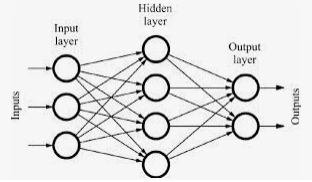

In [ ]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 784 # 28x28
hidden_size = 500 
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

examples = iter(test_loader)
example_data, example_targets = examples.next()

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(example_data[i][0], cmap='gray')
plt.show()

# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        # no activation and no softmax at the end
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

# Train the model
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')

CONVOLUTION NEURAL NETWORK(CNN)

A convolutional neural network (CNN or ConvNet), is a network architecture for deep learning which learns directly from data, eliminating the need for manual feature extraction.

CNNs are particularly useful for finding patterns in images to recognize objects, faces, and scenes. They can also be quite effective for classifying non-image data such as audio, time series, and signal data.

Applications that call for object recognition and computer vision — such as self-driving vehicles and face-recognition applications — rely heavily on CNNs.

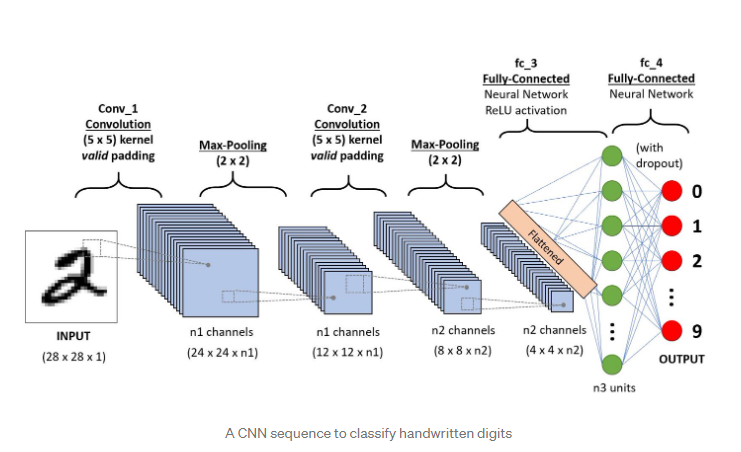

In [ ]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
num_epochs = 5
batch_size = 4
learning_rate = 0.001

# dataset has PILImage images of range [0, 1]. 
# We transform them to Tensors of normalized range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# CIFAR10: 60000 32x32 color images in 10 classes, with 6000 images per class
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # -> n, 3, 32, 32
        x = self.pool(F.relu(self.conv1(x)))  # -> n, 6, 14, 14
        x = self.pool(F.relu(self.conv2(x)))  # -> n, 16, 5, 5
        x = x.view(-1, 16 * 5 * 5)            # -> n, 400
        x = F.relu(self.fc1(x))               # -> n, 120
        x = F.relu(self.fc2(x))               # -> n, 84
        x = self.fc3(x)                       # -> n, 10
        return x


model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [4, 3, 32, 32] = 4, 3, 1024
        # input_layer: 3 input channels, 6 output channels, 5 kernel size
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 2000 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

print('Finished Training')
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)

with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        
        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')